Rosa Salazar Miranda
CC 1034988497

# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2024-2
---
1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$

---

2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.


---
3.  El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres al español.


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.



# **Ejercicio** **1**

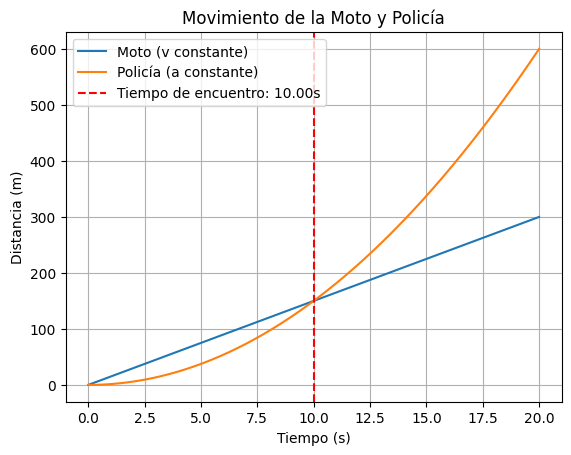

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def movimiento(v_m, a_p):
    t = np.linspace(0, 20, 1000)  # Tiempo entre 0 y 20 segundos

    # Posiciones
    x_moto = v_m * t
    x_policia = 0.5 * a_p * t**2

    # Tiempo encuentro
    t_encuentro = (2 * v_m) / a_p

    plt.plot(t, x_moto, label="Moto (v constante)")
    plt.plot(t, x_policia, label="Policía (a constante)")
    plt.axvline(x=t_encuentro, color='r', linestyle='--', label=f'Tiempo de encuentro: {t_encuentro:.2f}s')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Distancia (m)')
    plt.legend()
    plt.grid(True)
    plt.title('Movimiento de la Moto y Policía')
    plt.show()

# v_m = 15 m/s y a_p = 3 m/s²
movimiento(15, 3)


# **Ejercicio** **2**

In [ ]:
#a
#e es epsilon
def LJ_potential(r, e, sigma):
    term1 = (sigma / r) ** 12
    term2 = (sigma / r) ** 6
    return 4 * e * (term1 - term2)

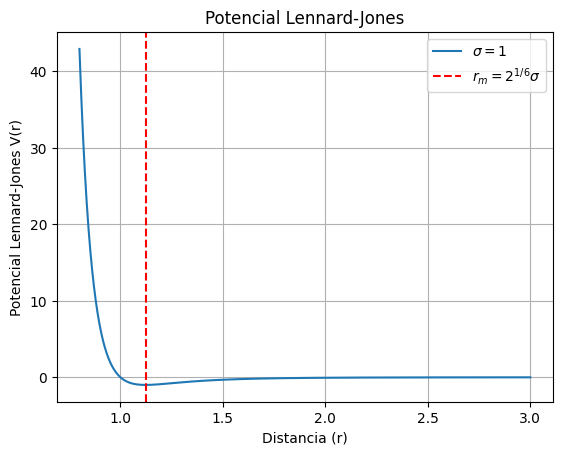

In [ ]:
#b
import numpy as np
import matplotlib.pyplot as plt

def graficar_LJ(e, sigma):
    r = np.linspace(0.8 * sigma, 3 * sigma, 500)
    V = LJ_potential(r, e, sigma)

    plt.plot(r, V, label=f'$\sigma={sigma}$')
    plt.axvline(x=2**(1/6) * sigma, color='r', linestyle='--', label=r'$r_m=2^{1/6}\sigma$')
    plt.xlabel('Distancia (r)')
    plt.ylabel('Potencial Lennard-Jones V(r)')
    plt.title('Potencial Lennard-Jones')
    plt.legend()
    plt.grid(True)
    plt.show()

# epsilon = 1, sigma = 1
graficar_LJ(1, 1)


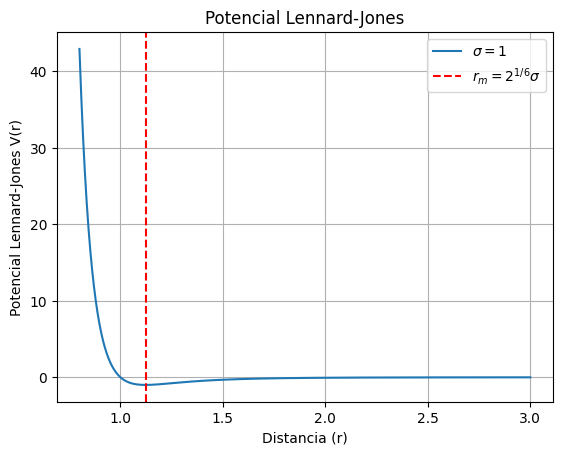

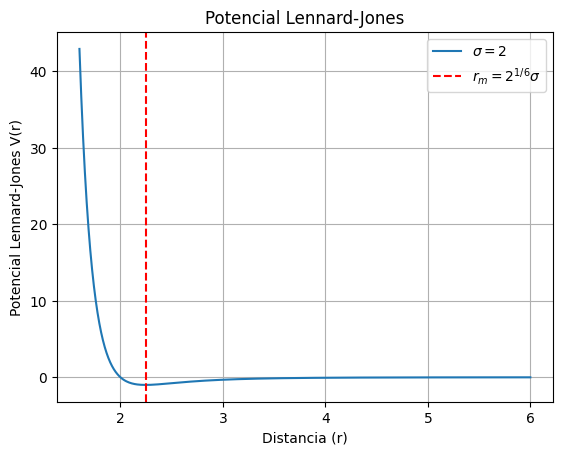

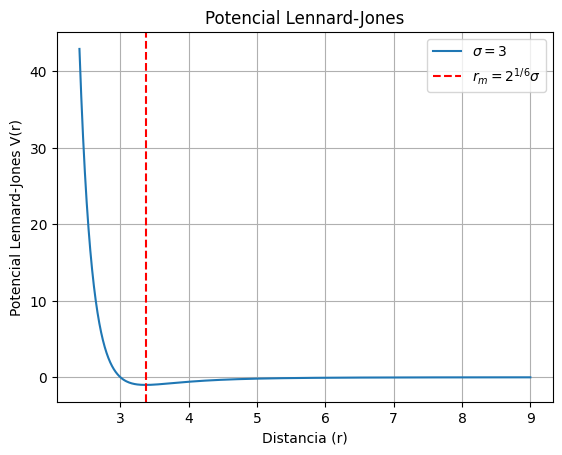

In [ ]:
#c

for sigma in [1, 2, 3]:
    graficar_LJ(1, sigma)

# **Ejercicio** **3**

In [ ]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

In [ ]:
#a limpieza
alturas = alturas.drop(columns=[col for col in alturas.columns if '(in)' in col])
alturas.columns = ['País', '19 años niños', '19 años niñas', '15 años niños', '15 años niñas', '10 años niños', '10 años niñas', '5 años niños', '5 años niñas']
alturas = alturas[~alturas['País'].str.contains('Total', na=False)]

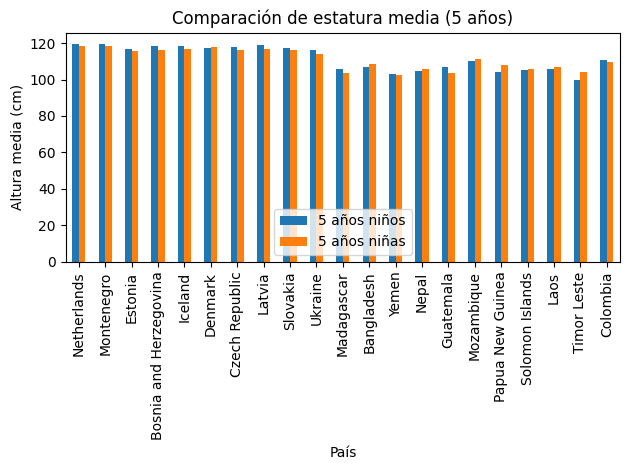

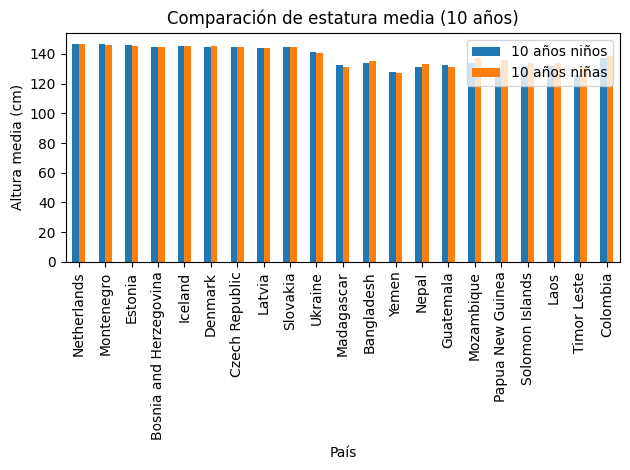

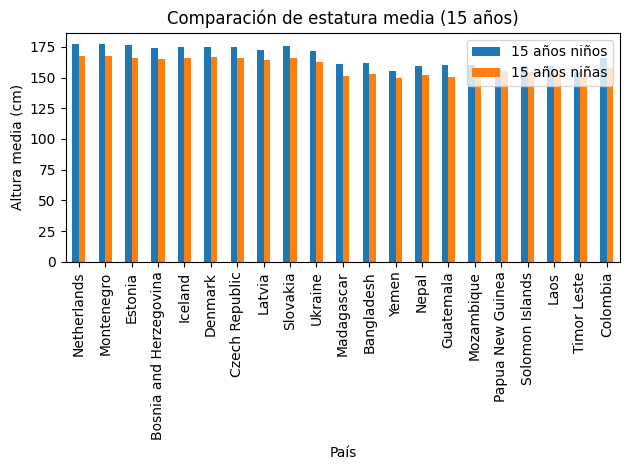

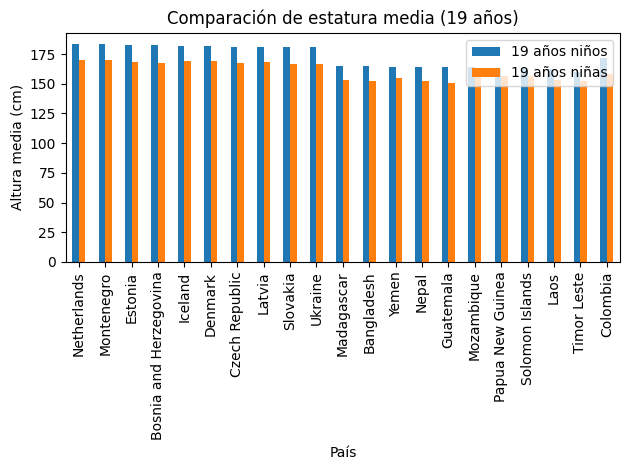

In [ ]:
#b
import pandas as pd
import matplotlib.pyplot as plt

# Asumamos que los datos ya han sido limpiados y tenemos el dataframe `alturas`
# Limpieza de columnas '(in)' y cambio de nombres de columnas ya se hizo anteriormente

# Filtrar los primeros 10 países más altos y los últimos 10 más bajos, agregando Colombia
top_altos = alturas.head(10)
top_bajos = alturas.tail(10)
colombia = alturas[alturas['País'] == 'Colombia']

# Concatenar solo los datos que nos interesan (primeros 10 más altos, últimos 10 más bajos y Colombia)
data_comparacion = pd.concat([top_altos, top_bajos, colombia])

# Gráfico para 5 años
data_comparacion.plot(
    x='País',
    y=['5 años niños', '5 años niñas'],
    kind='bar',
    title='Comparación de estatura media (5 años)'
)
plt.ylabel('Altura media (cm)')
plt.tight_layout()  # Ajustar el layout para evitar que se solapen las etiquetas
plt.show()

# Gráfico para 10 años
data_comparacion.plot(
    x='País',
    y=['10 años niños', '10 años niñas'],
    kind='bar',
    title='Comparación de estatura media (10 años)'
)
plt.ylabel('Altura media (cm)')
plt.tight_layout()
plt.show()

# Gráfico para 15 años
data_comparacion.plot(
    x='País',
    y=['15 años niños', '15 años niñas'],
    kind='bar',
    title='Comparación de estatura media (15 años)'
)
plt.ylabel('Altura media (cm)')
plt.tight_layout()
plt.show()

# Gráfico para 19 años
data_comparacion.plot(
    x='País',
    y=['19 años niños', '19 años niñas'],
    kind='bar',
    title='Comparación de estatura media (19 años)'
)
plt.ylabel('Altura media (cm)')
plt.tight_layout()
plt.show()


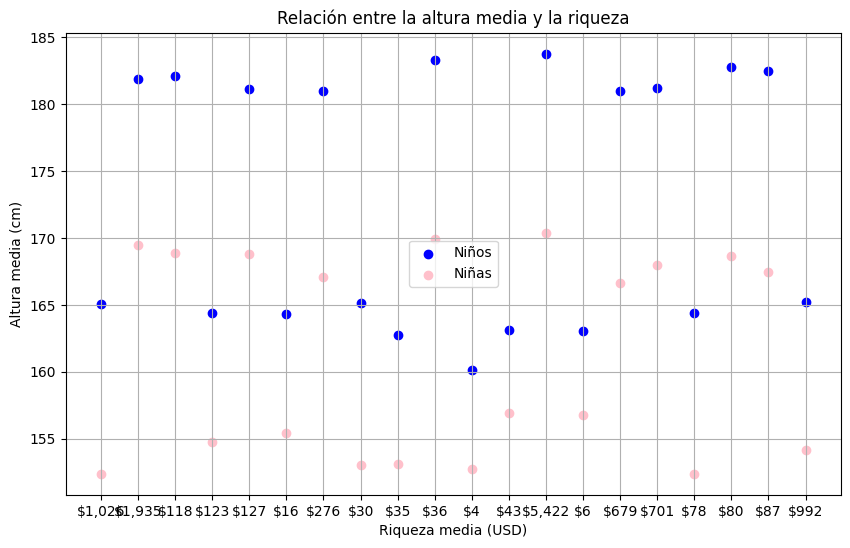

                       País  19 años niños  19 años niñas Riqueza media (USD)
183              Bangladesh         165.08         152.38              $1,026
5                   Denmark         181.89         169.47              $1,935
4                   Iceland         182.10         168.91                $118
184                   Yemen         164.42         154.76                $123
7                    Latvia         181.17         168.81                $127
187              Mozambique         164.30         155.42                 $16
8                  Slovakia         181.02         167.12                $276
182              Madagascar         165.16         153.06                 $30
190                    Laos         162.78         153.10                 $35
1                Montenegro         183.30         169.96                 $36
191             Timor Leste         160.13         152.71                  $4
188        Papua New Guinea         163.10         156.89       

In [ ]:
#c intento 1

income = income[~income['Country'].str.contains('Total', na=False)]
income.columns = ['País', 'Riqueza media (USD)','a','b','c']
income.reset_index(drop=True, inplace=True)

# Merge entre los datasets
merged_data = pd.merge(alturas, income, on='País', how='inner')

# Seleccionar datos de altura para los 10 mayores y 10 menores (19 años)
alturas_19 = merged_data[['País', '19 años niños', '19 años niñas', 'Riqueza media (USD)']]
alturas_19 = alturas_19.dropna()  # Eliminar filas con valores nulos

# Obtener los 10 mayores y menores países en altura
top_altos = alturas_19.nlargest(10, '19 años niños')  # 10 mayores
top_bajos = alturas_19.nsmallest(10, '19 años niños')  # 10 menores

# Concatenar los datos
data_comparacion = pd.concat([top_altos, top_bajos])



# Ordenar por riqueza de menor a mayor
data_comparacion = data_comparacion.sort_values(by='Riqueza media (USD)')

# Graficar la relación entre la altura media y la riqueza
plt.figure(figsize=(10, 6))
plt.scatter(data_comparacion['Riqueza media (USD)'], data_comparacion['19 años niños'], label='Niños', color='blue')
plt.scatter(data_comparacion['Riqueza media (USD)'], data_comparacion['19 años niñas'], label='Niñas', color='pink')
plt.title('Relación entre la altura media y la riqueza')
plt.xlabel('Riqueza media (Millon USD)')
plt.ylabel('Altura media (cm)')
plt.legend()
plt.grid()
plt.show()

# Mostrar los datos combinados para revisión
print(data_comparacion)


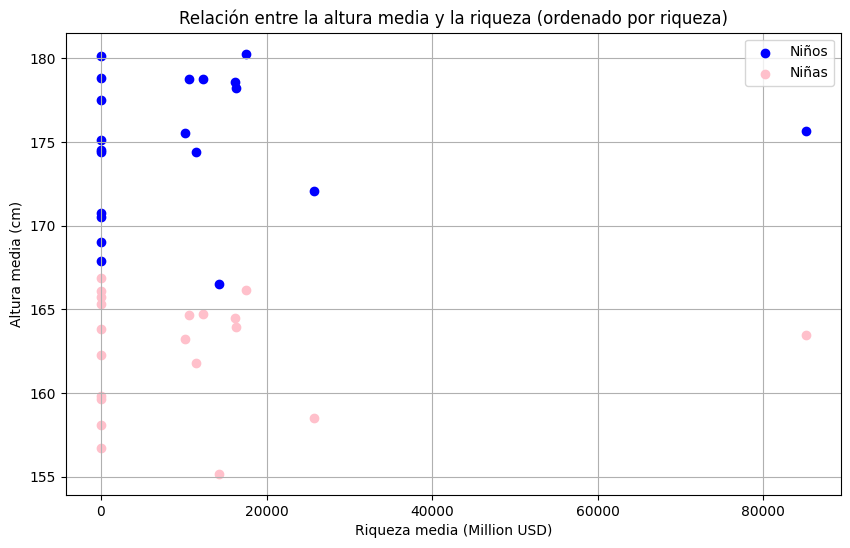

                                 País  19 años niños  19 años niñas  \
41   Saint Vincent and the Grenadines         177.49         165.30   
26                Antigua and Barbuda         178.84         165.72   
160                           Lesotho         167.92         156.72   
145          Central African Republic         169.01         159.65   
120                          Djibouti         170.77         159.82   
77                              Samoa         174.42         163.82   
19                           Dominica         180.15         166.89   
128                            Belize         170.52         158.12   
64                              Tonga         175.11         166.08   
75                           Suriname         174.51         162.26   
62                        South Korea         175.52         163.23   
28                          Australia         178.77         164.67   
76                              Italy         174.42         161.81   
29    

In [1]:
#c intento 2

import pandas as pd
import matplotlib.pyplot as plt

# Función para limpiar y cargar los datos
def cargar_datos():
    # Dataset 1: Alturas medias
    url_alturas = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
    html_content_alturas = pd.read_html(url_alturas)
    alturas = html_content_alturas[2]

    # Limpieza de datos: excluyendo la fila total
    alturas = alturas.drop(columns=[col for col in alturas.columns if '(in)' in col])
    alturas.columns = ['País', '19 años niños', '19 años niñas', '15 años niños', '15 años niñas',
                       '10 años niños', '10 años niñas', '5 años niños', '5 años niñas']
    alturas = alturas[~alturas['País'].str.contains('Total', na=False)]
    alturas.reset_index(drop=True, inplace=True)

    # Dataset 2: Ingresos medios
    url_ingresos = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
    html_content_ingresos = pd.read_html(url_ingresos)
    ingresos = html_content_ingresos[0]

    # Limpieza de datos: excluyendo la fila total
    ingresos = ingresos[~ingresos['Country'].str.contains('Total', na=False)]
    ingresos.columns = ['País', 'Riqueza media (USD)','a','b','c']
    ingresos.reset_index(drop=True, inplace=True)

    return alturas, ingresos

# Función para comparar riquezas y alturas
def comparar_riqueza_altura(alturas, ingresos):
    # Merge entre los datasets
    merged_data = pd.merge(alturas, ingresos, on='País', how='inner')

    # Seleccionar datos de altura para los 19 años
    alturas_19 = merged_data[['País', '19 años niños', '19 años niñas', 'Riqueza media (USD)']]
    alturas_19 = alturas_19.dropna()  # Eliminar filas con valores nulos

    alturas_19['Riqueza media (USD)'] = alturas_19['Riqueza media (USD)'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

    alturas_19['Riqueza media (USD)'] = pd.to_numeric(alturas_19['Riqueza media (USD)'], errors='coerce')

    # Obtener los 10 mayores y menores países en riqueza
    #df = pd.DataFrame(ingresos)
    #df['Riqueza Media (USD)'] = df['Riqueza Media (USD)'].astype(int)
    #df['Riqueza media (USD)'] = pd.to_numeric(df['Riqueza media (USD)'], errors='coerce')
    top_ricos = alturas_19.nlargest(10, 'Riqueza media (USD)')  # 10 mayores
    top_pobres = alturas_19.nsmallest(10, 'Riqueza media (USD)')  # 10 menores

    # Concatenar los datos
    data_comparacion = pd.concat([top_ricos, top_pobres])

    # Ordenar por riqueza de menor a mayor
    data_comparacion = data_comparacion.sort_values(by='Riqueza media (USD)')

    # Graficar la relación entre la altura media y la riqueza
    plt.figure(figsize=(10, 6))
    plt.scatter(data_comparacion['Riqueza media (USD)'], data_comparacion['19 años niños'], label='Niños', color='blue')
    plt.scatter(data_comparacion['Riqueza media (USD)'], data_comparacion['19 años niñas'], label='Niñas', color='pink')
    plt.title('Relación entre la altura media y la riqueza (ordenado por riqueza)')
    plt.xlabel('Riqueza media (Millon USD)')
    plt.ylabel('Altura media (cm)')
    plt.legend()
    plt.grid()
    plt.show()

    # Mostrar los datos combinados para revisión
    print(data_comparacion)

# Cargar los datos
alturas, ingresos = cargar_datos()

# Comparar riquezas y alturas
comparar_riqueza_altura(alturas, ingresos)



**CONCLUSION**

Existe una correlación positiva entre la riqueza media de un país y la altura media de su población juvenil. Los países más ricos tienden a tener personas más altas debido a un mejor acceso a alimentos nutritivos, atención médica y condiciones de vida favorables. Aunque la riqueza o mejor dicho, calidad de vida en un pais es un factor importante, no es completamente determinante, ya que también influyen aspectos genéticos y culturales, que explica variaciones en la altura en diferentes regiones.